Synthetic Dataset:
   MedicalHistoryCount  DoctorCount  FacilityCount  FacilityNeedsScore
0                    5            5              4           53.733601
1                    4            8              3           54.538985
2                    4            8              4           45.528712
3                    5           10              1           64.959182
4                    5            7              3           49.785651

Basic Statistics:
       MedicalHistoryCount  DoctorCount  FacilityCount  FacilityNeedsScore
count          1000.000000  1000.000000    1000.000000         1000.000000
mean              4.985000     7.974000       3.092000           52.263027
std               2.236465     2.694176       1.767105           16.385354
min               0.000000     1.000000       0.000000            0.000000
25%               3.000000     6.000000       2.000000           41.448034
50%               5.000000     8.000000       3.000000           52.501651
75%        

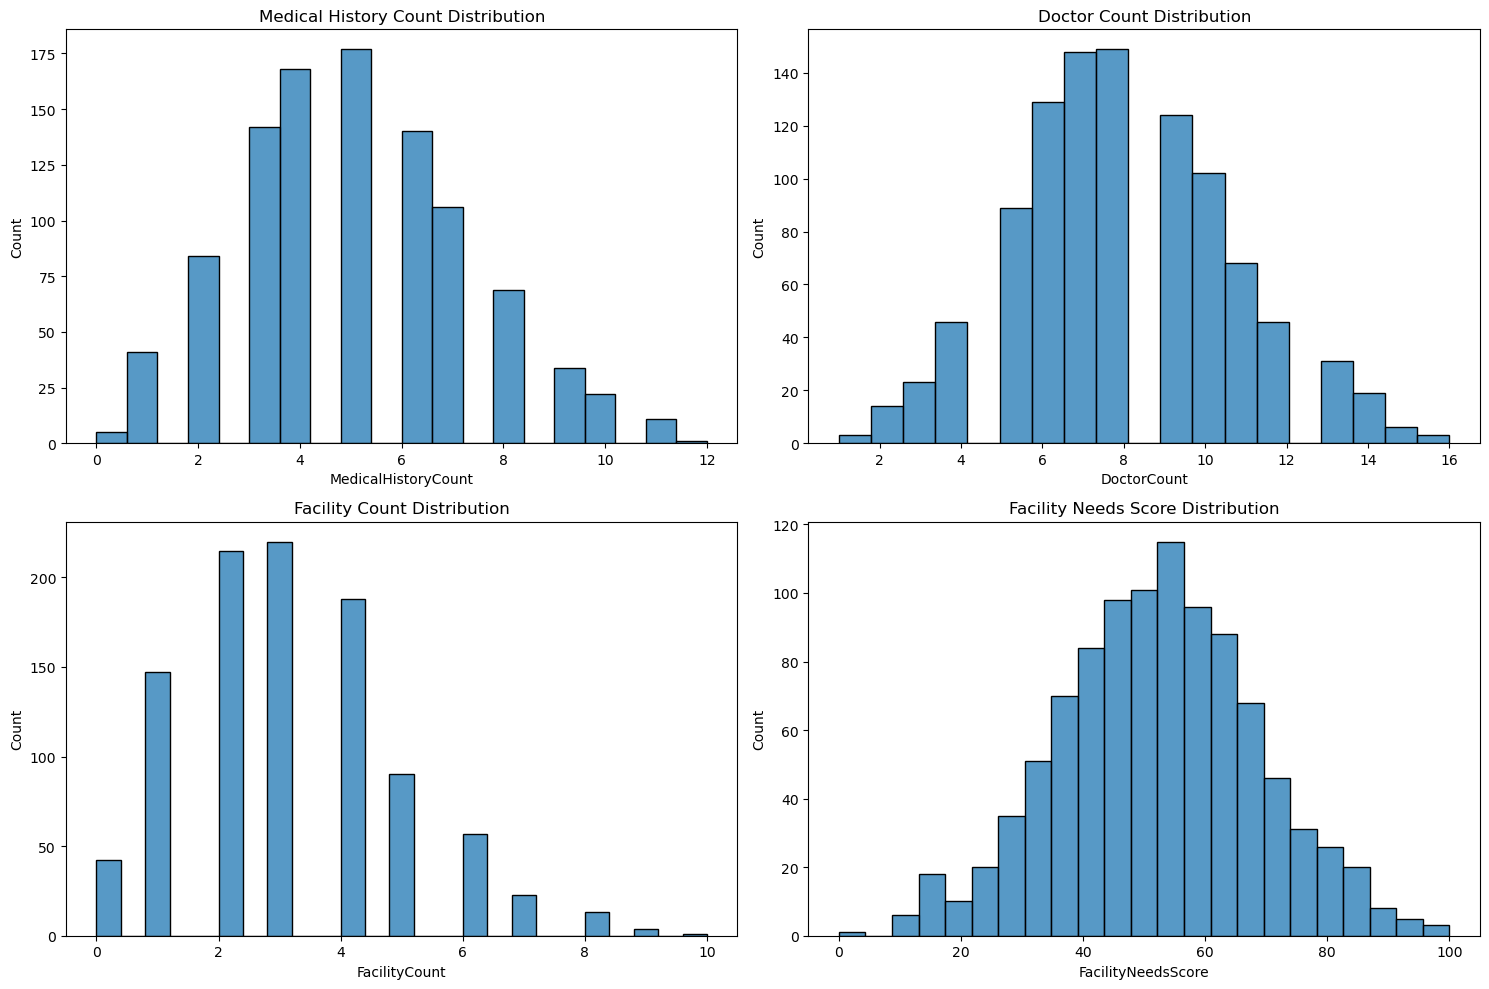

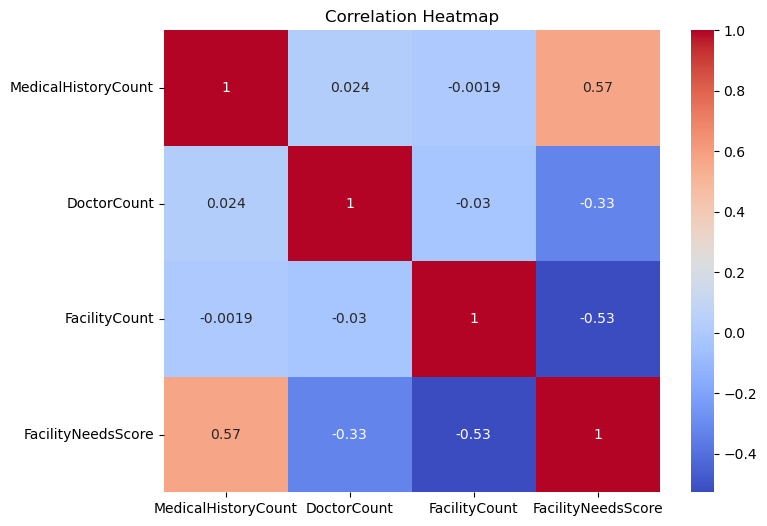


Training Linear Regression...
RMSE: 8.55
MAE: 7.14
R²: 0.6694

Training Random Forest...
RMSE: 10.46
MAE: 8.48
R²: 0.5060

Feature Importance:
MedicalHistoryCount    0.412447
FacilityCount          0.346257
DoctorCount            0.241295
dtype: float64

Training Gradient Boosting...
RMSE: 9.09
MAE: 7.61
R²: 0.6265

Feature Importance:
MedicalHistoryCount    0.432042
FacilityCount          0.363679
DoctorCount            0.204280
dtype: float64

Training Support Vector Regression...
RMSE: 9.18
MAE: 7.67
R²: 0.6194

Model Comparison:
                                RMSE       MAE        R²
Linear Regression           8.553970  7.142996  0.669353
Random Forest              10.455082  8.480374  0.506049
Gradient Boosting           9.091167  7.611704  0.626520
Support Vector Regression   9.177068  7.669261  0.619428


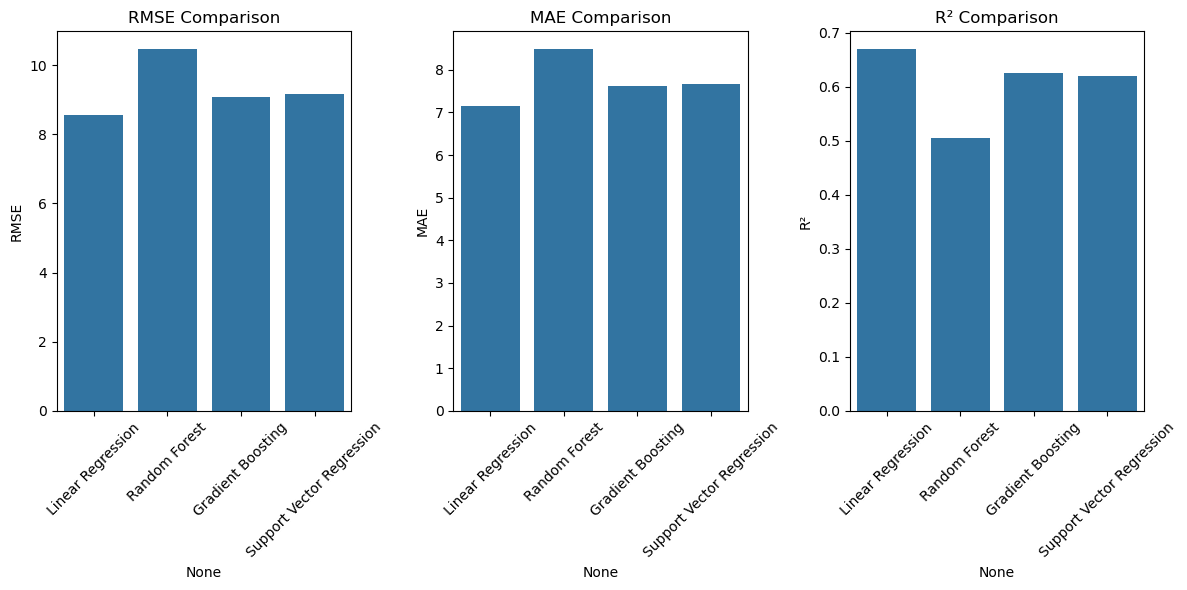


Best performing model based on R² score: Linear Regression


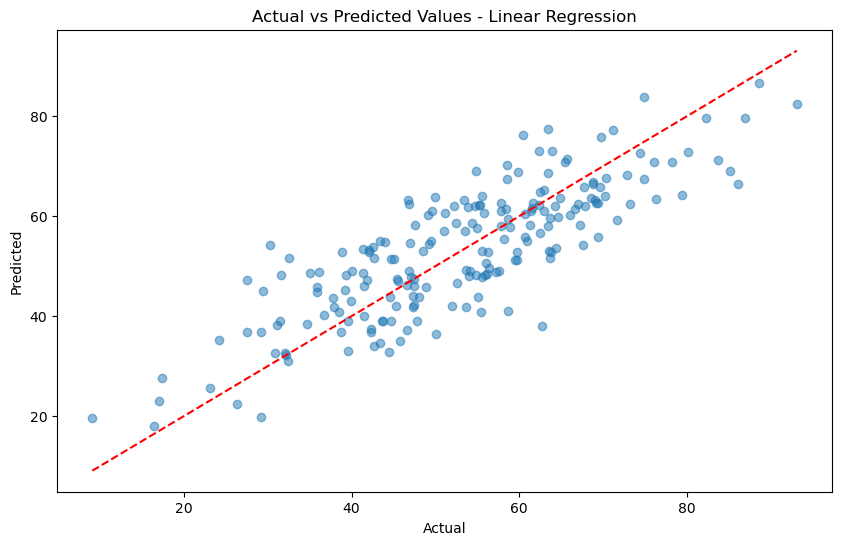

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data - 1000 samples
n_samples = 1000

# Generate features with realistic distributions
medical_history_count = np.random.poisson(lam=5, size=n_samples)  # Poisson for count data
doctor_count = np.random.poisson(lam=8, size=n_samples)
facility_count = np.random.poisson(lam=3, size=n_samples)

# Create a DataFrame
data = pd.DataFrame({
    'MedicalHistoryCount': medical_history_count,
    'DoctorCount': doctor_count,
    'FacilityCount': facility_count
})

# Calculate FacilityNeedsScore with some realistic formula and noise
# Higher medical history means more needs
# Higher doctor count means fewer needs
# Lower facility count means more needs
data['FacilityNeedsScore'] = (
    data['MedicalHistoryCount'] * 2.5 - 
    data['DoctorCount'] * 1.2 + 
    (10 - data['FacilityCount']) * 3 + 
    np.random.normal(0, 5, n_samples)  # Add some random noise
)

# Ensure score is positive and scale to 0-100 range
data['FacilityNeedsScore'] = data['FacilityNeedsScore'] - data['FacilityNeedsScore'].min()
data['FacilityNeedsScore'] = 100 * data['FacilityNeedsScore'] / data['FacilityNeedsScore'].max()

# Display the first few rows of the dataset
print("Synthetic Dataset:")
print(data.head())

# Basic statistics
print("\nBasic Statistics:")
print(data.describe())

# Data visualization
plt.figure(figsize=(15, 10))

# Histograms for each feature
plt.subplot(2, 2, 1)
sns.histplot(data['MedicalHistoryCount'])
plt.title('Medical History Count Distribution')

plt.subplot(2, 2, 2)
sns.histplot(data['DoctorCount'])
plt.title('Doctor Count Distribution')

plt.subplot(2, 2, 3)
sns.histplot(data['FacilityCount'])
plt.title('Facility Count Distribution')

plt.subplot(2, 2, 4)
sns.histplot(data['FacilityNeedsScore'])
plt.title('Facility Needs Score Distribution')

plt.tight_layout()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

plt.show()

# Machine Learning Model Comparison
# Prepare the data
X = data[['MedicalHistoryCount', 'DoctorCount', 'FacilityCount']]
y = data['FacilityNeedsScore']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models to compare
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regression': SVR()
}

# Train and evaluate models
results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # For SVR, use scaled data
    if name == 'Support Vector Regression':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {'RMSE': rmse, 'MAE': mae, 'R²': r2}
    
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R²: {r2:.4f}")
    
    # Feature importance (for models that support it)
    if hasattr(model, 'feature_importances_'):
        importances = pd.Series(model.feature_importances_, index=X.columns)
        print("\nFeature Importance:")
        print(importances.sort_values(ascending=False))

# Compare model performance
results_df = pd.DataFrame(results).T
print("\nModel Comparison:")
print(results_df)

# Visualize model comparison
plt.figure(figsize=(12, 6))

# RMSE comparison
plt.subplot(1, 3, 1)
sns.barplot(x=results_df.index, y='RMSE', data=results_df)
plt.title('RMSE Comparison')
plt.xticks(rotation=45)

# MAE comparison
plt.subplot(1, 3, 2)
sns.barplot(x=results_df.index, y='MAE', data=results_df)
plt.title('MAE Comparison')
plt.xticks(rotation=45)

# R² comparison
plt.subplot(1, 3, 3)
sns.barplot(x=results_df.index, y='R²', data=results_df)
plt.title('R² Comparison')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Get the best model based on R²
best_model = results_df['R²'].idxmax()
print(f"\nBest performing model based on R² score: {best_model}")

# For the best model, show predicted vs actual values
if best_model == 'Support Vector Regression':
    best_model_instance = models[best_model].fit(X_train_scaled, y_train)
    y_pred_best = best_model_instance.predict(X_test_scaled)
else:
    best_model_instance = models[best_model].fit(X_train, y_train)
    y_pred_best = best_model_instance.predict(X_test)

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Actual vs Predicted Values - {best_model}')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import joblib

best_model_name = results_df['R²'].idxmax()
print(f"Creating pipeline with best model: {best_model_name}")

# Create a pipeline with scaling and the best model
if best_model_name == 'Linear Regression':
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', LinearRegression())
    ])
elif best_model_name == 'Random Forest':
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', RandomForestRegressor(random_state=42))
    ])
elif best_model_name == 'Gradient Boosting':
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', GradientBoostingRegressor(random_state=42))
    ])
elif best_model_name == 'Support Vector Regression':
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', SVR())
    ])

# Prepare the data
X = data[['MedicalHistoryCount', 'DoctorCount', 'FacilityCount']]
y = data['FacilityNeedsScore']

# Train the pipeline on the full dataset
pipeline.fit(X, y)

# Save the trained pipeline to a file
joblib_file = 'facility_needs_model.joblib'
joblib.dump(pipeline, joblib_file)
print(f"Model saved to {joblib_file}")

# Example of how to use the saved model for prediction
def predict_facility_needs(medical_history_count, doctor_count, facility_count):
    # Load the model
    loaded_model = joblib.load('facility_needs_model.joblib')
    
    # Prepare the input data
    input_data = pd.DataFrame({
        'MedicalHistoryCount': [medical_history_count],
        'DoctorCount': [doctor_count],
        'FacilityCount': [facility_count]
    })
    
    # Make prediction
    prediction = loaded_model.predict(input_data)[0]
    return prediction

# Example usage
example_prediction = predict_facility_needs(
    medical_history_count=5, 
    doctor_count=8, 
    facility_count=3
)
print(f"Predicted Facility Needs Score: {example_prediction:.2f}")

Creating pipeline with best model: Linear Regression
Model saved to facility_needs_model.joblib
Predicted Facility Needs Score: 52.73
